## Majid Feiz
## Visualization of GMM and EM


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Owner/Documents/Majid/IBM/Interview_question/advertising.csv')
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


array([[<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Age'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Age', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Area Income'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>,
        <AxesSubplot:xlabel='Age', ylabel='Daily Intern

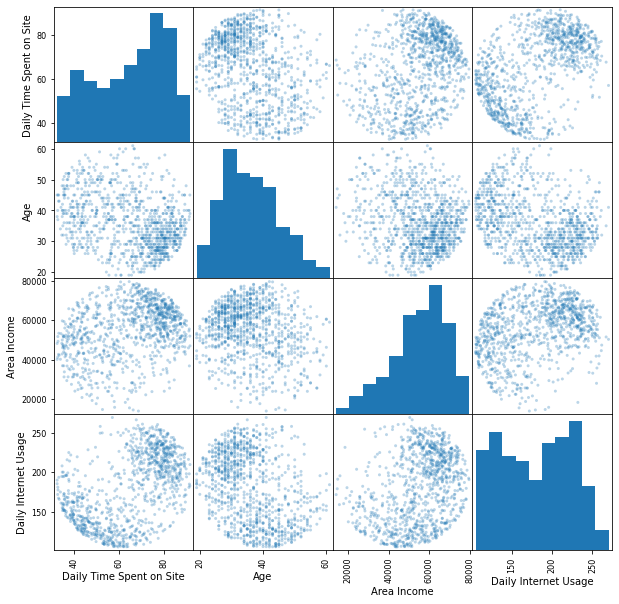

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],
    alpha=0.3, figsize=(10,10))

In [4]:
# let us setup the font size
plt.rcParams['axes.labelsize']  = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

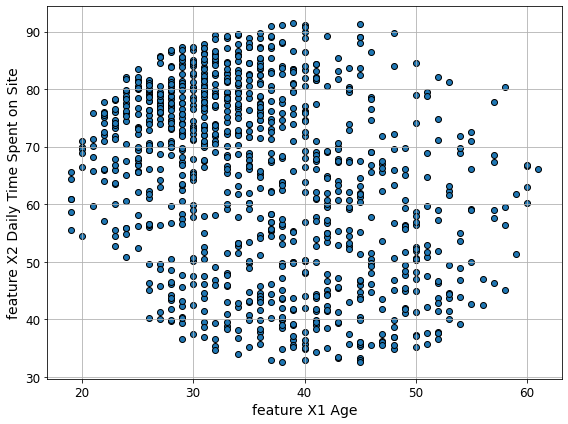

In [5]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(data.Age, data['Daily Time Spent on Site'],  edgecolor='black' ) #cmap=plt.cm.Set2
plt.xlabel('feature X1 Age')
plt.ylabel('feature X2 Daily Time Spent on Site')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()

In [6]:
X=np.array([data.Age , data['Daily Time Spent on Site']]).T
#print(type(X))
X[:,:]

array([[35.  , 68.95],
       [31.  , 80.23],
       [26.  , 69.47],
       ...,
       [51.  , 51.63],
       [19.  , 55.55],
       [26.  , 45.01]])

Inertia: 91086.51019813427


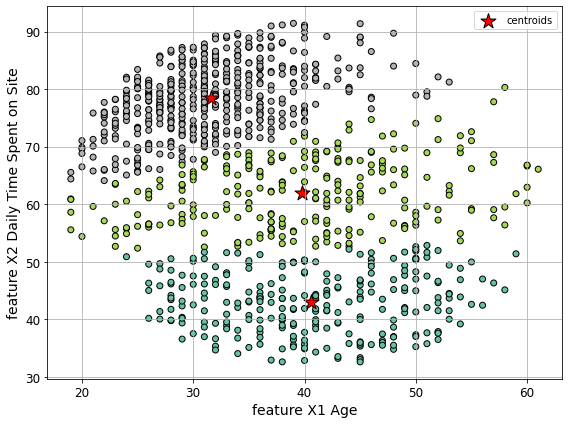

In [7]:

# Set the number of clusters to 3 (easy case)
NCLUS = 3

# ... 1. Define the k-means classifier
from sklearn.cluster import KMeans
km_clf = KMeans(n_clusters=NCLUS, 
                init='random', # This parameter says how to initialize. It can be "random" or "kmeans++"
                n_init=15, max_iter=300, tol=1e-04, random_state=36)

# ... 2. Apply the k-means classifier to the data
Y_pred = km_clf.fit_predict(X)

# ... 3. Print out the amount of distortion of the estimated clusterization
print('Inertia:', km_clf.inertia_)

# ... 4. Determine the silhouette value for the estimated clusterization
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, Y_pred, metric='euclidean')

# Let us plot the scattered samples with the estimated centroids
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y_pred, cmap=plt.cm.Set2, edgecolor='k')
plt.scatter(km_clf.cluster_centers_[:, 0],km_clf.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel('feature X1 Age')
plt.ylabel('feature X2 Daily Time Spent on Site')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


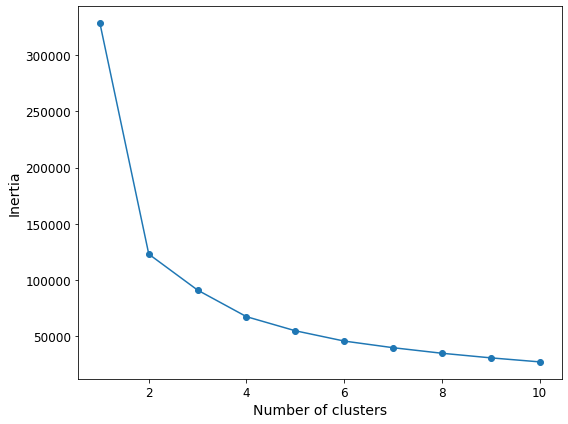

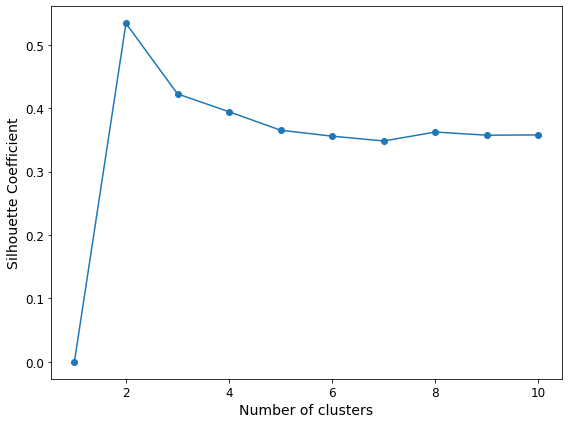

In [8]:
from sklearn.metrics import silhouette_score

# let us now vary the number of clusters and find the best number of clusters
inertia = []
silhouette = [0]


# for each number of clusters in the assigned range...
for NCLUS in range(1, 11):
    km_clf = KMeans(n_clusters = NCLUS, init='random', n_init=15, max_iter=300, tol=1e-04, random_state=36)
    Y_pred = km_clf.fit_predict(X)
    inertia.append(km_clf.inertia_)
    
    # remember: silhouette coefficient can be computed in case of 2+ clusters...
    if (NCLUS>1):
        silhouette.append(silhouette_score(X, Y_pred, metric='euclidean'))

# Let us plot the distortion values versus the number of clusters
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

# Let us plot the silhouette coefficient versus the number of clusters
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.plot(range(1, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

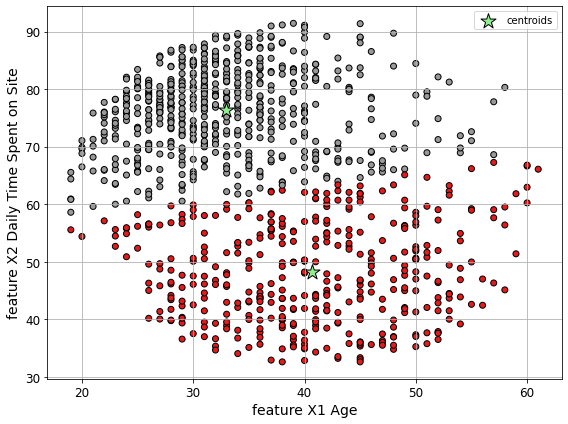

In [9]:
# Let us run the k-Means algorithm with 2 clusters
NCLUS = 2
km_clf2 = KMeans(n_clusters=NCLUS, init='random', n_init=15, max_iter=300, tol=1e-04, random_state=36)
Y2_pred = km_clf2.fit_predict(X)

# Let us plot the scattered samples with the estimated centroids
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y2_pred, cmap=plt.cm.Set1, edgecolor='k')
plt.scatter(km_clf2.cluster_centers_[:, 0],km_clf2.cluster_centers_[:, 1], s=250, marker='*', c='lightgreen', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel('feature X1 Age')
plt.ylabel('feature X2 Daily Time Spent on Site')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()

#### Step 3 and Step 4

In [10]:
print(type(km_clf2.cluster_centers_))
km_clf2.cluster_centers_#[:,0]
print('X1,Y1 {} and X2,Y2 {}'.format(km_clf2.cluster_centers_[0, :],km_clf2.cluster_centers_[1, :]))

<class 'numpy.ndarray'>
X1,Y1 [40.62686567 48.15390547] and X2,Y2 [32.90468227 76.32496656]


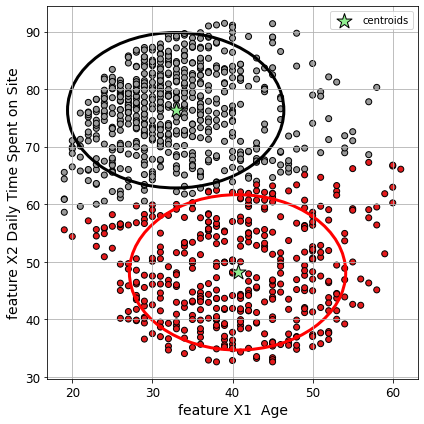

In [11]:
# Let us run the k-Means algorithm with 2 clusters
NCLUS = 2
km_clf2 = KMeans(n_clusters=NCLUS, init='random', n_init=15, max_iter=300, tol=1e-04, random_state=36)
Y2_pred = km_clf2.fit_predict(X)

# Let us plot the scattered samples with the estimated centroids
plt.figure(1, figsize=(6, 6))
plt.clf()

fig = plt.gcf()
ax = fig.gca()

plt.scatter(X[:, 0], X[:, 1], c=Y2_pred, cmap=plt.cm.Set1, edgecolor='k')
plt.scatter(km_clf2.cluster_centers_[:, 0],km_clf2.cluster_centers_[:, 1], s=250, marker='*', c='lightgreen', edgecolor='black', label='centroids')
circle1=plt.Circle(km_clf2.cluster_centers_[0, :], 13.5, fill=False,  edgecolor="red", linewidth=3)
circle2=plt.Circle(km_clf2.cluster_centers_[1, :], 13.5, fill=False,  edgecolor="black", linewidth=3)
plt.legend(scatterpoints=1)
plt.xlabel('feature X1  Age')
plt.ylabel('feature X2 Daily Time Spent on Site')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.show()

### Step 5

Based on the Silhouette, K=2 is the best choice to cluster the data

### Step 6 GMM

In [12]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

gmm = GaussianMixture(n_components=2)
gmm.fit(X)

GaussianMixture(n_components=2)

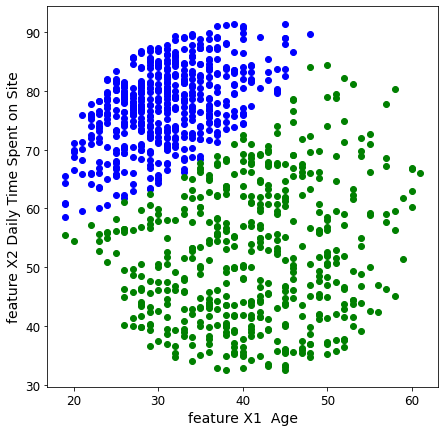

In [13]:
#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']
plt.figure(figsize=(7,7))
color=['blue', 'green']
for k in range(0,2):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.xlabel('feature X1  Age')
plt.ylabel('feature X2 Daily Time Spent on Site')
plt.show()


### Step 7

 Looks like the GMM-EM is better predicted the cluster comparing to K-mean and clearly decompose the two groups of two ages (younger vs older age in internet usage.  I would use GMM-EM for this data because I can express the internet usage for lower age as a probability around the mean value of the two ages, older vs younger

### Step 8

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2064: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

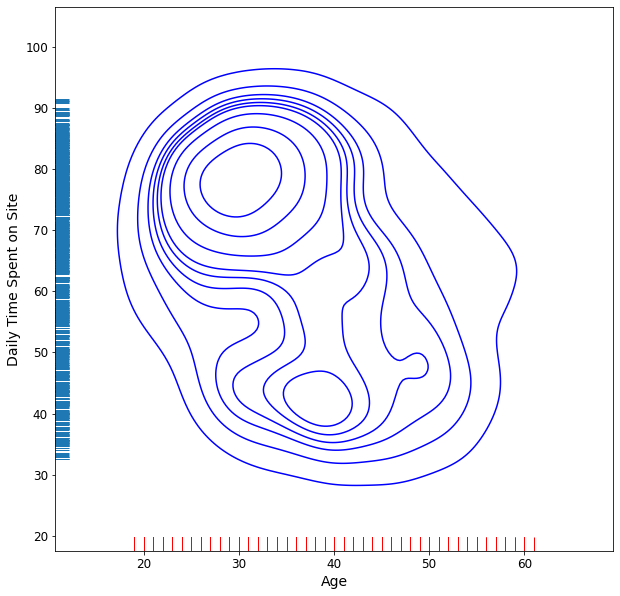

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data.Age, data['Daily Time Spent on Site'], color="b", ax=ax)
sns.rugplot(data.Age, color="r", ax=ax)
sns.rugplot(data['Daily Time Spent on Site'], vertical=True, ax=ax)

In [18]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


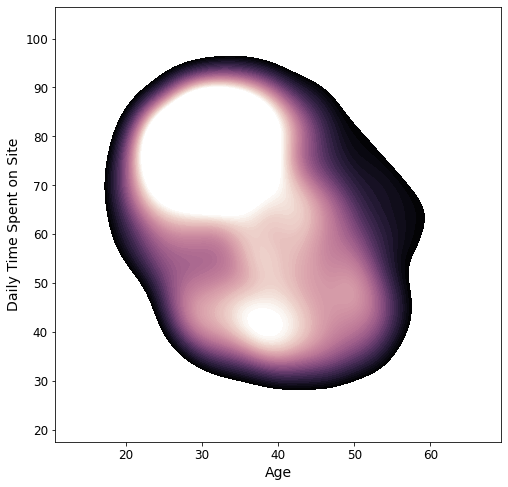

In [19]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(data.Age,data["Daily Time Spent on Site"],
    cmap=cmap, n_levels=100, shade=True);

## Part 2: K-means and GMM

In [15]:
#HW7 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
from scipy.stats.kde import gaussian_kde
from sklearn.neighbors import KernelDensity

from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
import numpy
import scipy
import random
from sklearn.neighbors import KernelDensity
%matplotlib inline

data = data = pd.read_csv('C:/Users/Owner/Documents/Majid/IBM/Interview_question/advertising.csv')

app = dash.Dash(__name__)

bins_ = round(np.sqrt(data.Age.count()));
binSize = [10, bins_, 50, 100]
Bandwidth = [0.1, 0.5, 0.9]

# Setup the Dash layout.
app.layout = html.Div([
    html.Div([html.H5("Bin Sizes"),
              html.P("(Recommended: 50)"),
              dcc.RadioItems(
                  id="histogram_binSize",
                  options=[{"value": x, "label": x} for x in binSize],
                  value=binSize[1],
                  labelStyle={"display": "inline-block"}),
              html.H5("Bandwidth Sizes"),
              html.P("(Recommended: 0.9)"),
              dcc.RadioItems(
                  id="kde_bw_selection",
                  options=[{"value": x, "label": x} for x in Bandwidth],
                  value=Bandwidth[1],
                  labelStyle={"display": "inline-block"})
             ]),
    dcc.Graph(id="histogram", style={"width:": "50%", "display": "inline-block"}),
    dcc.Graph(id="kde", style={"width": "50%", "display": "inline-block"})],
    style={"width": "100%", "display": "inline-block"})

# Create callback for listening to KDE bandwidth radio buttons.
@app.callback([Output("histogram", "figure"), Output("kde", "figure")], 
              [Input("histogram_binSize", "value"), Input("kde_bw_selection", "value")])

def histo_kde_fig(histogram_binSize, kde_bw_selection):
    # Handle the Histogram Plot.
    fig_histo = px.histogram(data.Age, 
                       title="Interactive Visitors Age Histogram",
                       nbins= histogram_binSize) #, x="Age",
    
    x_ = np.array(data['Age'])
    hist_data = [x_]
    group_labels = ['data.Age'] # name of the dataset
    fig_kde = ff.create_distplot(hist_data, group_labels, bin_size=kde_bw_selection)
    
    #fig_histo.show()
    #fig_kde.show()
    
    return fig_histo, fig_kde

app.run_server(debug=False, host="127.0.0.1", port=8078, threaded=True)

Dash is running on http://127.0.0.1:8078/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8078/ (Press CTRL+C to quit)


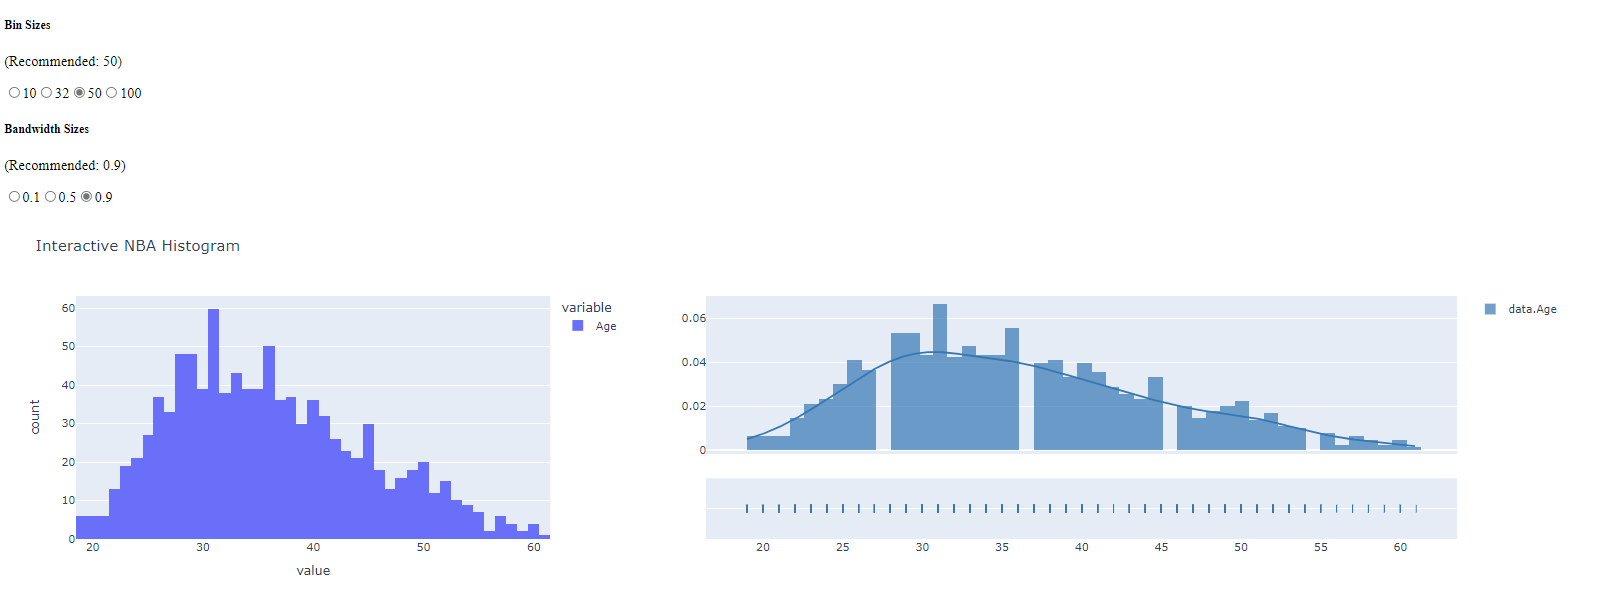